C:\Users\user\AppData\Local\Temp\ipykernel_26744\3293014993.py:12: DtypeWarning: Columns (370,376,382,388,394,400,406,412,418,424,430,436,442,448,454,460,466,472,478,484,490,496,502,508,514,520,526,532,538,544,550,556,562,568,574,580,586,592,598,604,610,616,622,628,634,640,646,652,658,664,670,676,682,688) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_tier_merged.csv')


XGBoost 모델 교차 검증 중...
XGBoost 테스트 MSE: 0.06259576231241226, R2: 0.7496168938668677


C:\Users\user\AppData\Local\Temp\ipykernel_26744\3293014993.py:94: UserWarning: Glyph 54260 (\N{HANGUL SYLLABLE POL}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_26744\3293014993.py:94: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_26744\3293014993.py:94: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_26744\3293014993.py:94: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_26744\3293014993.py:94: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_26744\3293014993.py:94: UserWarning: Glyph 44273 (\N{HANGUL SYLLABLE GOB}) missing from current font.
  plt.tight_layout()
C

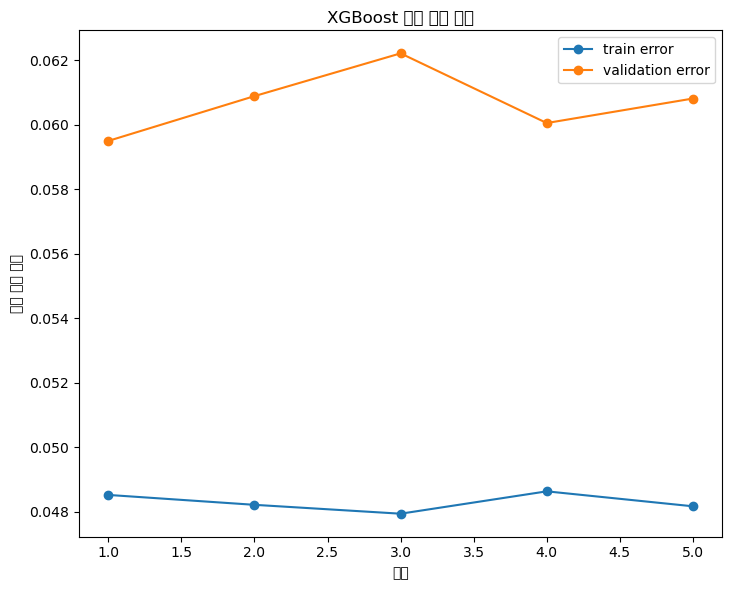

                        feature  importance
57                          kda    0.258574
13           inhibitorTakedowns    0.110081
36               baronTakedowns    0.071731
72              allyjungleratio    0.049007
33              turretTakedowns    0.048173
32           totalTimeSpentDead    0.044551
11                  dragonKills    0.029717
60                junglepertime    0.029344
6       damageDealtToObjectives    0.025442
59                   exppertime    0.018529
31           totalMinionsKilled    0.018121
23                   timePlayed    0.014770
55         teamDamagePercentage    0.011279
27             totalDamageTaken    0.011097
66                  tankpergold    0.010211
38  damageTakenOnTeamPercentage    0.007892
68                    kapertime    0.007387
5        damageDealtToBuildings    0.006646
62                   exppergold    0.005734
70                dealtankratio    0.005708


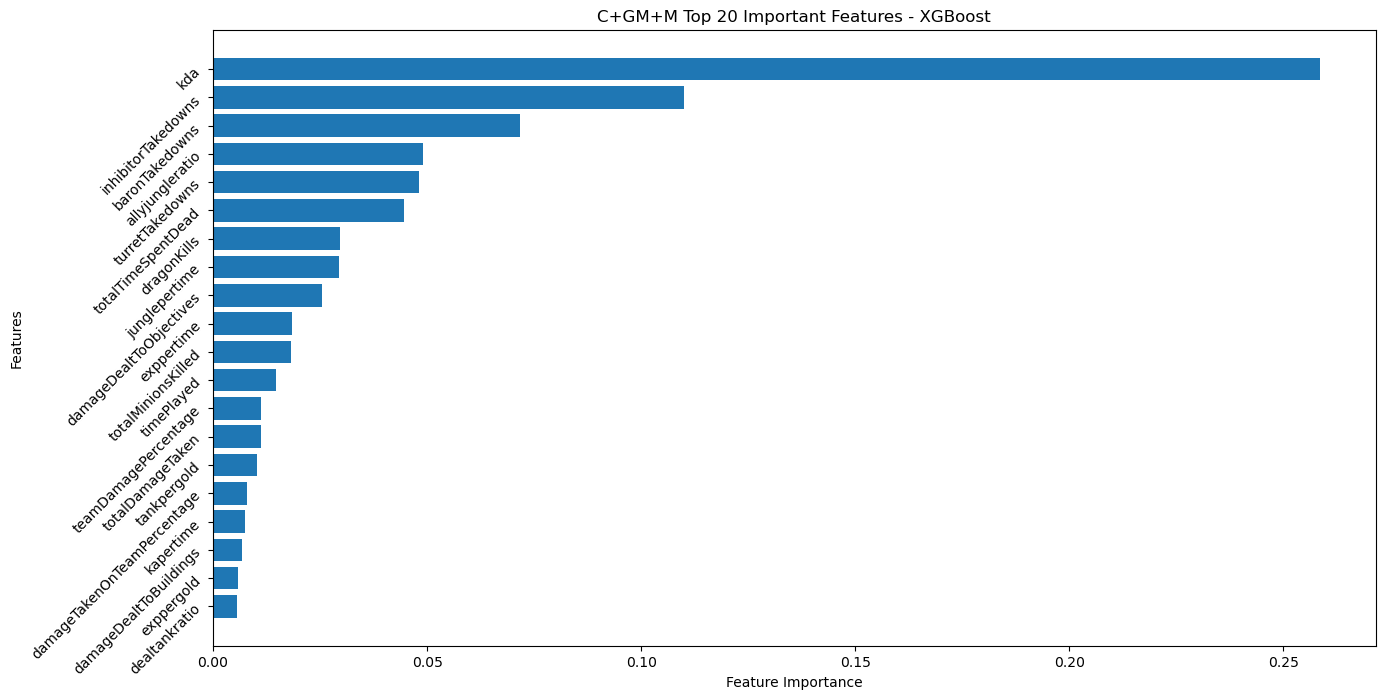

 99%|===================| 22633/22822 [01:46<00:00]        

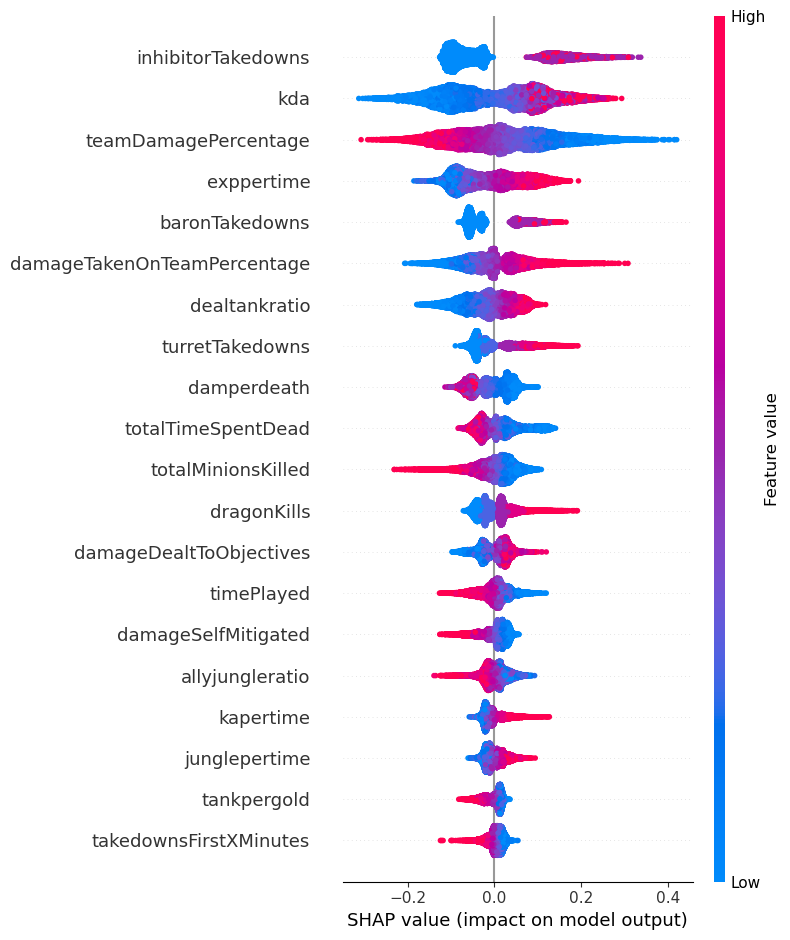

Top 20 Features by Mean Absolute SHAP Values
                        feature  mean_abs_shap
0            inhibitorTakedowns       0.098685
1                           kda       0.098030
2          teamDamagePercentage       0.094107
3                    exppertime       0.063916
4                baronTakedowns       0.057023
5   damageTakenOnTeamPercentage       0.055943
6                 dealtankratio       0.045566
7               turretTakedowns       0.044126
8                   damperdeath       0.036092
9            totalTimeSpentDead       0.035910
10           totalMinionsKilled       0.034292
11                  dragonKills       0.030893
12      damageDealtToObjectives       0.026578
13                   timePlayed       0.024788
14          damageSelfMitigated       0.023479
15              allyjungleratio       0.020379
16                    kapertime       0.019001
17                junglepertime       0.018016
18                  tankpergold       0.016771
19       takedo

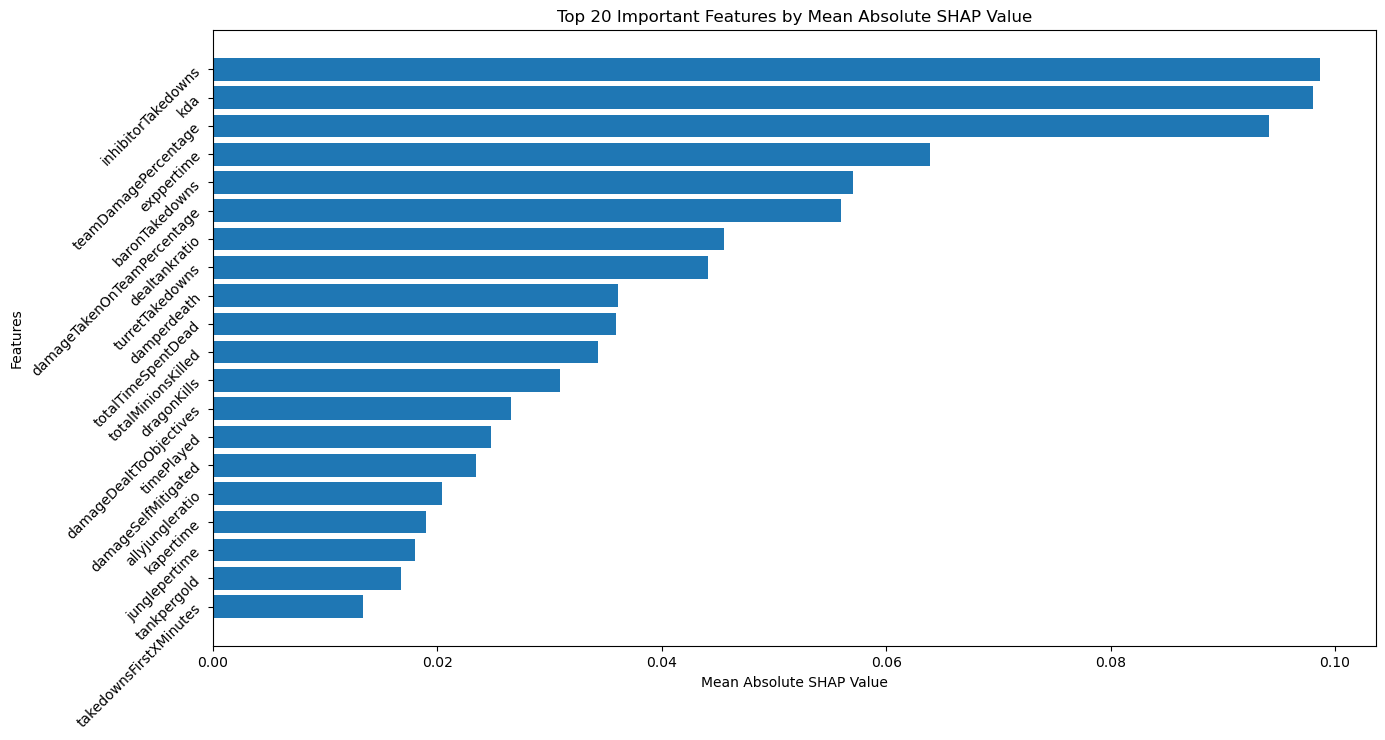

   Unnamed: 0   assists  baronKills  champExperience  champLevel  \
0   -0.595837 -0.113406   -0.567766        -0.328884   -0.082572   
1   -1.678436 -0.942458   -0.567766        -1.209184   -1.171457   
2   -1.447515 -0.735195   -0.567766         0.061781    0.280390   
3   -0.927562 -0.113406   -0.567766         0.803734    1.006314   
4   -1.671973 -0.527932   -0.567766        -0.229707   -0.082572   

   damageDealtToBuildings  damageDealtToObjectives  damageDealtToTurrets  \
0               -0.568914                -0.967855             -0.568914   
1               -0.714610                -0.100936             -0.714610   
2                0.290787                -0.292195              0.290787   
3               -0.657200                 1.079045             -0.657200   
4                0.451438                -0.112662              0.451438   

   damageSelfMitigated    deaths  ...  jungleMinionsKilled_9  level_9  \
0            -0.502838  0.067740  ...               0.005197 

ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
import shap

# 데이터프레임 불러오기
df = pd.read_csv('all_tier_merged.csv')
df_filtered = df[df['Tier_x'] == 'Bronze']

# 제외할 컬럼 정의
columns_to_exclude = [
    'Tier_x', 'matchId', 'gameType', 'championName_x', 'item0', 'item1', 'item2', 'item3', 'item4',
    'item5', 'item6', 'participantId_x', 'teamId', 'teamPosition', 'perk1', 'perk1_var1', 'perk1_var2',
    'perk1_var3', 'perk2', 'perk2_var1', 'perk2_var2', 'perk2_var3', 'perk3', 'perk3_var1', 'perk3_var2',
    'perk3_var3', 'perk4', 'perk4_var1', 'perk4_var2', 'perk4_var3', 'perk5', 'perk5_var1', 'perk5_var2',
    'perk5_var3', 'perk6', 'perk6_var1', 'perk6_var2', 'perk6_var3', 'season', 'teamcolor'
]

# 지정된 컬럼을 제외한 새로운 데이터프레임 생성
df_filtered = df_filtered.drop(columns=columns_to_exclude)

# 'damperdeath' 이후의 시계열 컬럼 식별
time_series_start_index = df_filtered.columns.get_loc('totalminionskillpertime') + 1
time_series_columns = df_filtered.columns[time_series_start_index:]

# 'position_'으로 시작하는 컬럼 제외
time_series_columns = [col for col in time_series_columns if not col.startswith('position_')]

# 10분 이하의 컬럼만 추출
time_series_columns_10min = [col for col in time_series_columns if int(col.split('_')[-1]) <= 10]

# 최종 데이터프레임 생성
final_columns = df_filtered.columns[:time_series_start_index].tolist() + time_series_columns_10min
df_final = df_filtered[final_columns]

# 타겟 변수와 특징 변수 정의
target = 'win_x'  # 'win_x'가 타겟 변수라고 가정
features = [col for col in df_final.columns if col != target]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_final[features], df_final[target], test_size=0.2, random_state=42)

# StandardScaler 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 초기화
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_train_errors = []
xgb_val_errors = []

print("XGBoost 모델 교차 검증 중...")
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    xgb_model.fit(X_train_fold, y_train_fold)
    y_train_pred = xgb_model.predict(X_train_fold)
    y_val_pred = xgb_model.predict(X_val_fold)

    xgb_train_errors.append(mean_squared_error(y_train_fold, y_train_pred))
    xgb_val_errors.append(mean_squared_error(y_val_fold, y_val_pred))

# 테스트 데이터에 대한 예측 및 성능 평가
xgb_model.fit(X_train, y_train)
xgb_test_predictions = xgb_model.predict(X_test)
xgb_test_mse = mean_squared_error(y_test, xgb_test_predictions)
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

print(f"XGBoost 테스트 MSE: {xgb_test_mse}, R2: {xgb_test_r2}")

# 결과 그래프 그리기
folds = np.arange(1, kf.get_n_splits() + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, xgb_train_errors, marker='o', label='train error')
plt.plot(folds, xgb_val_errors, marker='o', label='validation error')
plt.title('XGBoost 교차 검증 오류')
plt.xlabel('폴드')
plt.ylabel('평균 제곱 오차')
plt.legend()

plt.tight_layout()
plt.show()

importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({'feature': features, 'importance': importance})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# 상위 20개 중요 컬럼 출력
top_20_features = importance_df.head(20)
print(top_20_features)

plt.figure(figsize=(15, 8))
plt.barh(importance_df['feature'][:20], importance_df['importance'][:20])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.yticks(rotation=45)
plt.title('C+GM+M Top 20 Important Features - XGBoost')
plt.gca().invert_yaxis()
plt.show()

# SHAP explainer 초기화
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# SHAP summary plot (with feature values)
shap.summary_plot(shap_values, X_test, plot_type="dot", feature_names=features)

# 각 특성의 SHAP 값을 추출
shap_values_array = shap_values.values  # SHAP 값 배열
shap_values_df = pd.DataFrame(shap_values_array, columns=features)

# 각 특성별 SHAP 값의 평균 절대값 계산
shap_mean_abs_values = shap_values_df.abs().mean().sort_values(ascending=False)
shap_mean_abs_df = pd.DataFrame({'feature': shap_mean_abs_values.index, 'mean_abs_shap': shap_mean_abs_values.values})

# SHAP 값의 평균 절대값 상위 20개 특성 출력
top_20_shap_features = shap_mean_abs_df.head(20)
print("Top 20 Features by Mean Absolute SHAP Values")
print(top_20_shap_features)

# SHAP 값 시각화
plt.figure(figsize=(15, 8))
plt.barh(top_20_shap_features['feature'], top_20_shap_features['mean_abs_shap'])
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Features')
plt.yticks(rotation=45)
plt.title('Top 20 Important Features by Mean Absolute SHAP Value')
plt.gca().invert_yaxis()
plt.show()

# 각 특성의 SHAP 값과 실제 값을 포함한 DataFrame 생성
shap_values_df['SHAP_sum'] = shap_values_df.sum(axis=1)
shap_combined_df = pd.concat([pd.DataFrame(X_test, columns=features), shap_values_df], axis=1)

# 상위 5개의 샘플에 대해 확인
print(shap_combined_df.head())

# LIME explainer 초기화
explainer_lime = LimeTabularExplainer(
    X_train, 
    feature_names=features, 
    class_names=['win_x'], 
    verbose=True, 
    mode='regression'
)

# 특정 샘플에 대한 예측 설명
i = 0  # 첫 번째 샘플로 테스트
exp = explainer_lime.explain_instance(X_test[i], xgb_model.predict, num_features=10)

# 설명 결과 시각화
exp.show_in_notebook(show_all=False)
